<div class="alert alert-block alert-success">
    <b><center>DEEP NEURAL NETWORK</center></b>
    <b><center>MNIST 데이터로 DNN 구현해 보기</center></b>
</div>

# Configure Learning Environment

In [1]:
# !pip install git+https://github.com/nockchun/rspy --force
import rspy as rsp
rsp.setSystemWarning(off=True)

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
import seaborn as sns
from ipywidgets import interact
import tensorflow as tf
from tensorflow.keras import utils, layers, models, losses

In [3]:
np.set_printoptions(linewidth=200, precision=2)
sns.set_style("whitegrid")
tf.__version__

'2.0.0'

# Prepare Datas

In [4]:
# Download the mnist dataset using keras
(trainDatas, trainLabels), (testDatas, testLabels) = tf.keras.datasets.mnist.load_data()
trainDatas.shape, trainLabels.shape, testDatas.shape, testLabels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

# Preprocessing Data

In [5]:
# # 2차원(28*28)이미지를 1차원 배열로 변환
trainDatas = trainDatas.reshape(-1, 28, 28, 1)
testDatas = testDatas.reshape(-1, 28, 28, 1)

# trainDatas.shape, testDatas.shape

In [6]:
# 레이블 one hot encoding
trainLabels = np.eye(10)[trainLabels]
testLabels  = np.eye(10)[testLabels]

trainLabels.shape, trainLabels.shape

((60000, 10), (60000, 10))

# Generate Model

In [7]:
model = models.Sequential([
    layers.Input([28, 28, 1]),
    layers.Conv2D(32, (3, 3), activation=tf.keras.activations.relu),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(32, (3, 3), activation=tf.keras.activations.relu),
    layers.MaxPool2D((2,2)),
    layers.Flatten(),
    layers.Dense(256, activation=tf.keras.activations.relu),
    layers.Dropout(0.2),
    layers.Dense(10, activation=tf.keras.activations.softmax)
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               205056    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0

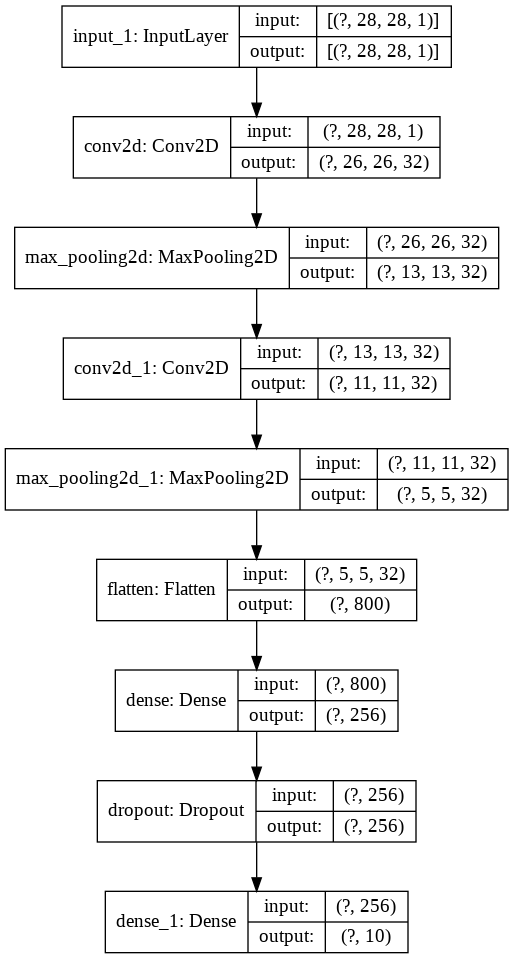

In [8]:
utils.plot_model(model, 'model.png', show_shapes=True)

In [9]:
model.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    metrics = ["accuracy"]
)

# Training

In [10]:
history = model.fit(
    trainDatas, trainLabels,
    batch_size=1000,
    epochs=20,
    validation_split=0.2
)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 2s 39us/sample - loss: 13.5410 - accuracy: 0.3584 - val_loss: 1.6567 - val_accuracy: 0.7763
Epoch 2/20
48000/48000 [==============================] - 0s 9us/sample - loss: 2.4571 - accuracy: 0.7254 - val_loss: 0.7711 - val_accuracy: 0.8843
Epoch 3/20
48000/48000 [==============================] - 0s 9us/sample - loss: 1.2283 - accuracy: 0.8265 - val_loss: 0.5121 - val_accuracy: 0.9100
Epoch 4/20
48000/48000 [==============================] - 0s 9us/sample - loss: 0.7896 - accuracy: 0.8684 - val_loss: 0.3762 - val_accuracy: 0.9261
Epoch 5/20
48000/48000 [==============================] - 0s 9us/sample - loss: 0.5716 - accuracy: 0.8958 - val_loss: 0.2962 - val_accuracy: 0.9375
Epoch 6/20
48000/48000 [==============================] - 0s 9us/sample - loss: 0.4424 - accuracy: 0.9094 - val_loss: 0.2481 - val_accuracy: 0.9452
Epoch 7/20
48000/48000 [==============================] - 0s

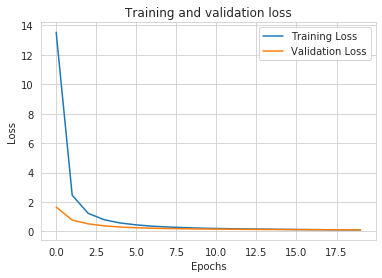

In [11]:
loss = history.history["loss"]
validationLoss = history.history["val_loss"]
epochs = range(0, len(loss))

plt.plot(epochs, loss, label="Training Loss")
plt.plot(epochs, validationLoss, label="Validation Loss")
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate

In [12]:
evaLoss, evaAcc = model.evaluate(testDatas, testLabels,verbose=0)
evaLoss, "{:3.2f} %".format(evaAcc*100)

(0.10011041675647721, '97.26 %')

# Predict

In [16]:
data = testDatas[10].reshape(-1, 28, 28, 1)

In [18]:
data

array([[[[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],

        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],

        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
    

In [17]:
dataPred = model.predict(data)

TypeError: Value passed to parameter 'input' has DataType uint8 not in list of allowed values: float16, bfloat16, float32, float64

In [15]:
@interact(idx=(0, 10000))
def showTestImage(idx):
    data = testDatas[idx].reshape(-1, 28, 28, 1)
    dataPred = model.predict(data)
    
    plt.imshow(testDatas[idx].reshape(28,28), cmap="gray")
    plt.grid(False)
    plt.title(f"LABEL: {np.argmax(testLabels[idx])}, PREDICT: {np.argmax(dataPred)}")
    plt.show()

interactive(children=(IntSlider(value=5000, description='idx', max=10000), Output()), _dom_classes=('widget-in…